In [148]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
import random
import math
import pandas as pd
from cmath import *

In [149]:
#Function for action
def comm_sq(x,y):
    A = np.matmul(x,y)-np.matmul(y,x)
    return np.matmul(A,A)

def get_action(Z):
    res = 0
    for i in range(d):
        for j in range(d):
            S = comm_sq(Z[i],Z[j])
            res += (np.trace(S)).real
    return (-N)*res/4

In [225]:
#Parameters
N = 10
d = 8
EPS = 0.18
GAP = 1000
therm = int(5e4)
sweeps = 150000
S_exact = (N*N-1)*d/4

In [ ]:
#Initializing random Field X
x = np.zeros((d,N,N),dtype=complex)
for scalar in range(d):
    for i in range(N):
        for j in range(N):
            if i<j:
                x[scalar][i][j] = complex(0 + 0*1j)
                x[scalar][j][i] = np.conj((x[scalar][i][j]))
            elif(i==j):
                x[scalar][i][j] = complex(0+0j)
    #print(x[scalar])
                
#Metropolis algorithm for thermalization

s_list = []
n = 0
s_avg = 0
s_sq = 0
s_err = 0
    
for i in range(therm):
    old_action = get_action(x)
    x_new = np.copy(x)

    index_a = np.random.randint(0, d)
    index_b = np.random.randint(0, N)
    index_c = np.random.randint(0, N)
    rand = 2 * (random.random() - 0.5) + 2 * (random.random() - 0.5) * 1j
    
    if (index_b == index_c):
        x_new[index_a][index_b][index_c] += EPS * 2 * (random.random() - 0.5) +0j
    else:
        x_new[index_a][index_b][index_c] += EPS * rand
        x_new[index_a][index_c][index_b] = np.conj(x_new[index_a][index_b][index_c])
        
    #print(x_new-x)

    new_action = get_action(x_new)

    delta_S = new_action - old_action
    u = random.random()

    if (delta_S <= 0 or np.exp(-delta_S) >= u):
        x = np.copy(x_new)
        if(therm%GAP == 0):
            s = get_action(x)
            s_list.append(s)
    else:
        if(therm%GAP == 0):
            s = get_action(x)
            s_list.append(s)

In [ ]:
#Metropolis algorithm for Generation sweeps
n = 0
accept = 0
no_calls = 0
a_rate = []
s_sweep = []
s_sq_list = []
s_avg = 0
s_sq = 0
s_err = 0

#print(x)
for i in range(sweeps):
    no_calls += 1
    old_action = get_action(x)
    x_new = np.copy(x)

    index_a = np.random.randint(0, d)
    index_b = np.random.randint(0, N)
    index_c = np.random.randint(0, N)
    rand = 2 * (random.random() - 0.5) + 2 * (random.random() - 0.5) * 1j
    
    if (index_c == index_b):
        x_new[index_a][index_b][index_c] += EPS * 2 * (random.random() - 0.5) + 0j
        
    else:
        x_new[index_a][index_b][index_c] += EPS * rand
        x_new[index_a][index_c][index_b] = np.conj(x_new[index_a][index_b][index_c])
        

    new_action = get_action(x_new)

    delta_S = new_action - old_action
    u = random.random()

    if (delta_S <= 0 or np.exp(-delta_S) >= u):
        s = get_action(x)
        accept += 1
        
    
        x = np.copy(x_new)
        if(sweeps%GAP == 0):
            s_sweep.append(s)
            s_sq_list.append(s*s)
            a_rate.append(accept * 100.0 / no_calls)
    else:
        if(sweeps%GAP == 0):
            s = get_action(x)
            s_sweep.append(s)
s_avg = sum(s_sweep)/len(s_sweep)
s_sq =   sum((s_sq_list))/len(s_sq_list)
s_err = sqrt(s_sq - s_avg*s_avg)/no_calls

In [ ]:
print(s_avg,"+",s_err.real)
print(S_exact)

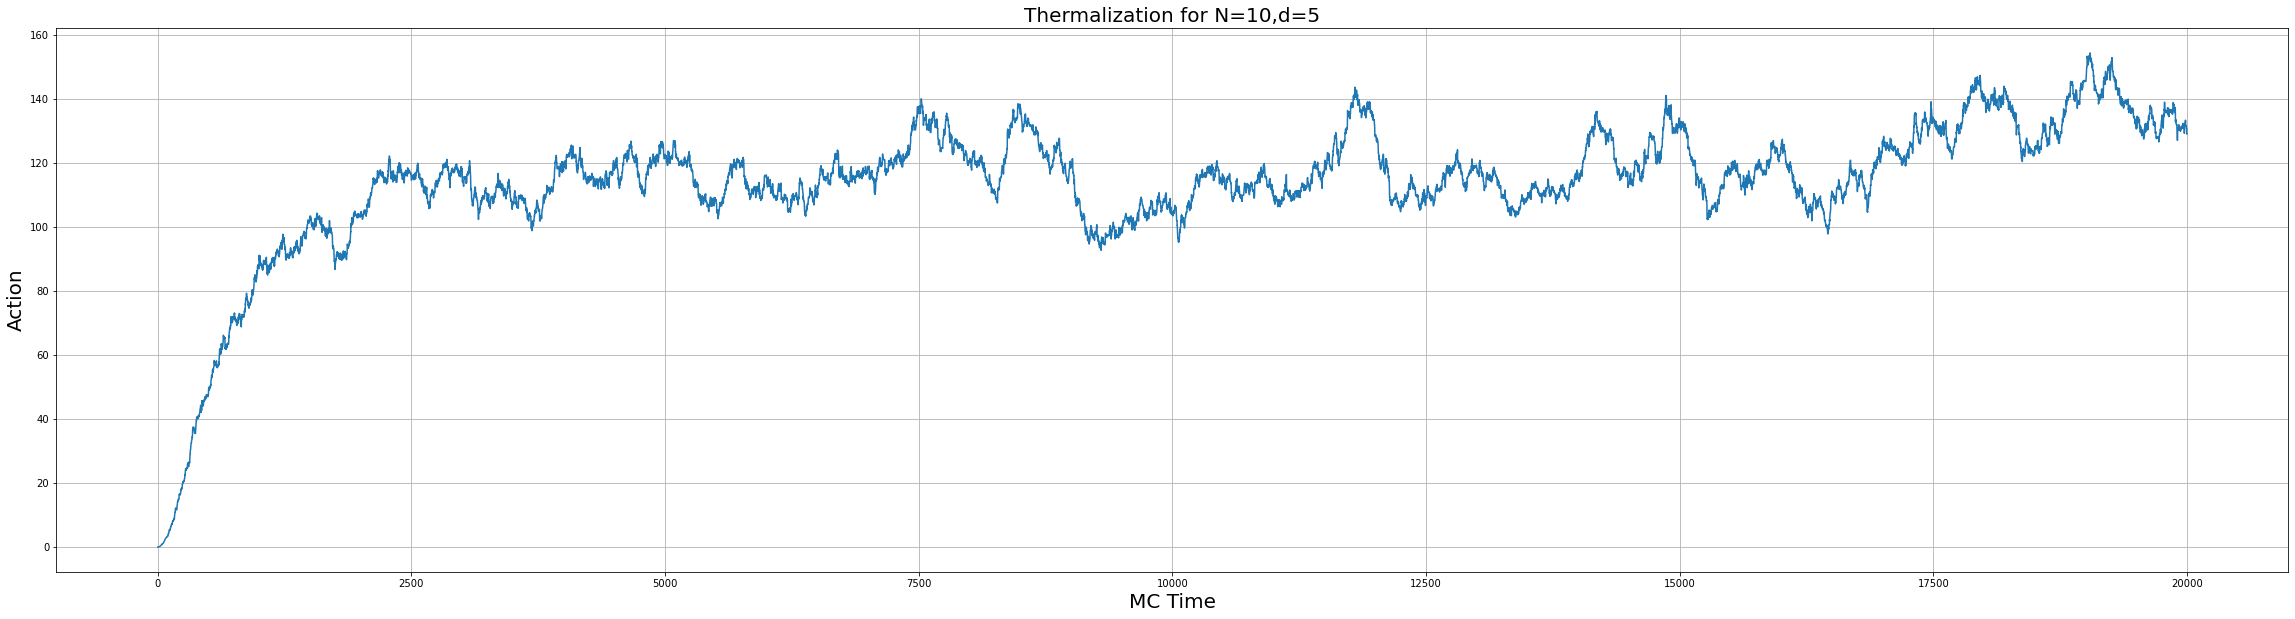

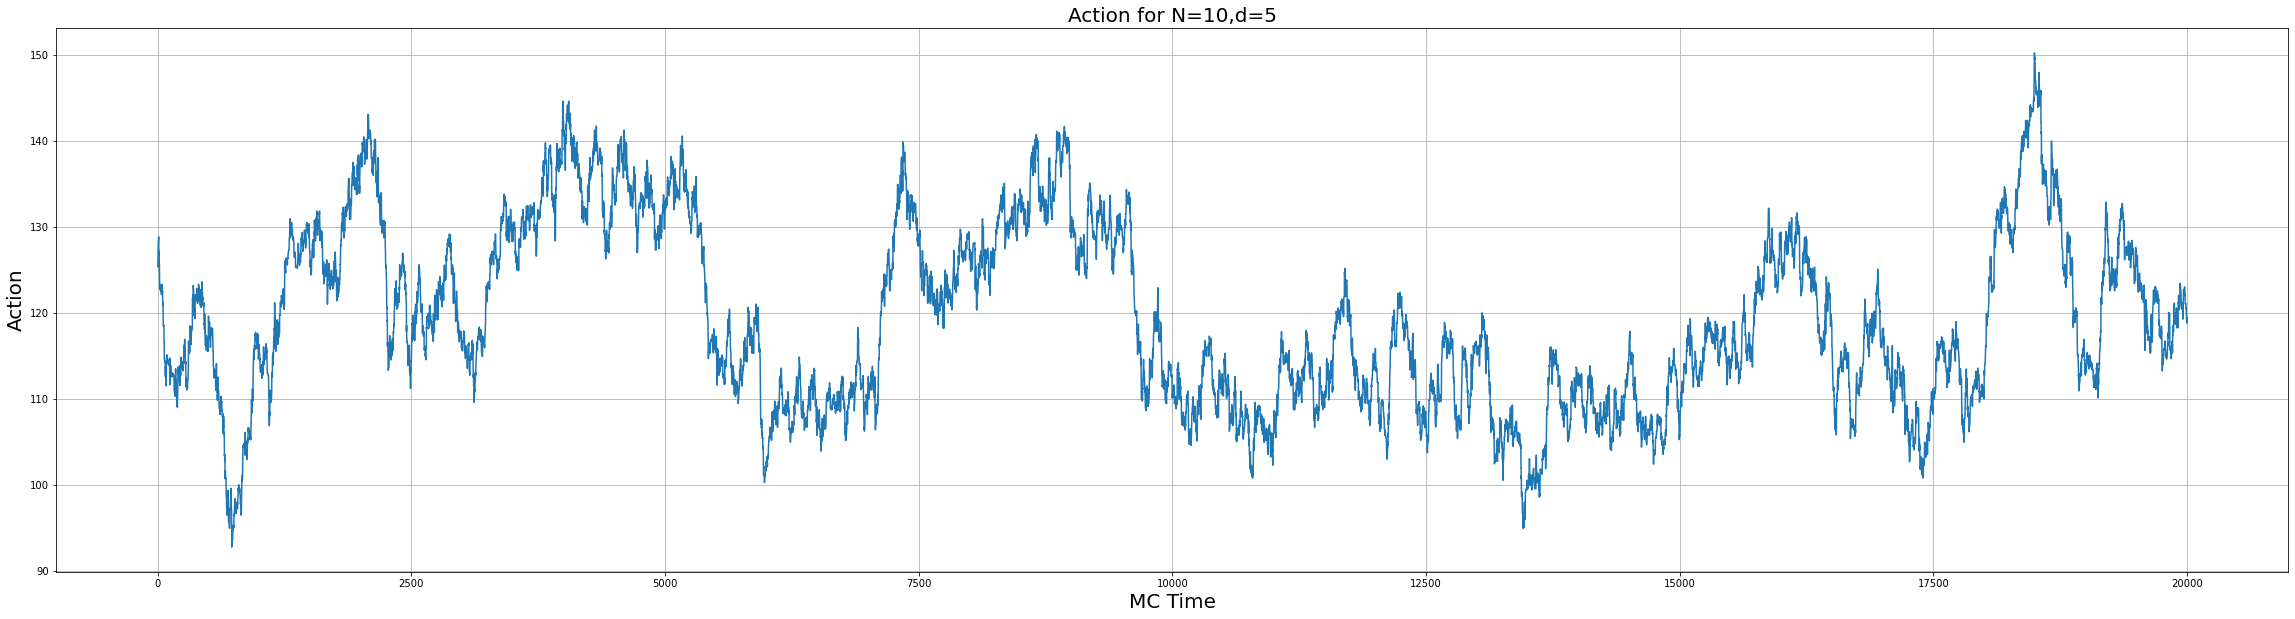

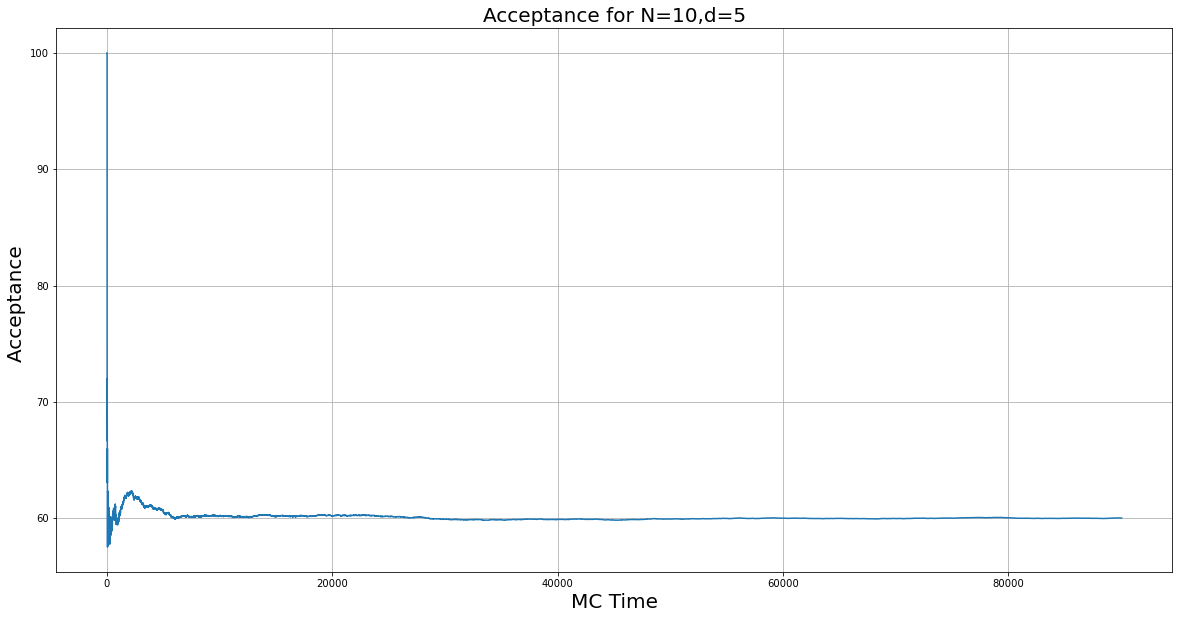

In [220]:
#%matplotlib qt5
#%matplotlib inline
fig, ax  = plt.subplots(figsize = (40, 10))
plt.plot(range(len(s_list[:20000])),s_list[:20000])
plt.title("Thermalization for N=10,d=8",fontsize=20)
plt.ylabel("Action",fontsize = 20)
plt.xlabel("MC Time",fontsize = 20)
plt.grid()
fig.savefig("Thermalization  N=10 d=8.jpg",bbox_inches = 'tight')

fig, ax = plt.subplots(figsize = (40, 10))
plt.plot(range(len(s_sweep[:20000])),s_sweep[:20000])
plt.title("Action for N=10,d=8",fontsize=20)
plt.ylabel("Action",fontsize = 20)
plt.xlabel("MC Time",fontsize = 20)
plt.grid()
fig.savefig("Action N=10,d=8.jpg",bbox_inches = 'tight')

fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(range(len(a_rate[1:])),a_rate[1:])
plt.title("Acceptance for N=10,d=8",fontsize=20)
plt.ylabel("Acceptance ",fontsize = 20)
plt.xlabel("MC Time",fontsize = 20)
plt.grid()
fig.savefig("Acceptance  N=10,d=8.jpg",bbox_inches = 'tight')